# Imports

In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers

%matplotlib inline  
import matplotlib.pyplot as plt

# Gather Data

In [48]:
# Download the digits data
! wget https://nyc3.digitaloceanspaces.com/ai-classroom/digits.csv

--2020-05-03 12:26:52--  https://nyc3.digitaloceanspaces.com/ai-classroom/digits.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘digits.csv.1’

digits.csv.1        100%[===================>]  73.22M  27.4MB/s    in 2.7s    

2020-05-03 12:26:55 (27.4 MB/s) - ‘digits.csv.1’ saved [76775041/76775041]



In [49]:
# Take a look at the raw data
! head digits.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

# Pre-process the data

In [50]:
# Read the data into a dataframe
data = pd.read_csv('digits.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# one hot encode the labels
data = pd.concat([data, pd.get_dummies(data['label'])], axis=1)
del(data['label'])
data[list(range(0,10))].head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


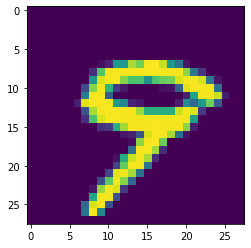

In [52]:
for_plot = data[data.columns[0:-10]].values.reshape(42000,28,28)
plt.imshow(for_plot[121])

In [0]:
# Create training and test sets
train = data.sample(frac=0.8,random_state=200) 
test = data.drop(train.index)

# Define the model

In [0]:
# mynet initializes our neural network model
def mynet(input_size, hidden1_size, hidden2_size):

  # This is a Sequential "stack of layers" model.
  model = Sequential()

  # Add the input and hidden layers. 
  model.add(Dense(hidden1_size, input_dim=input_size, activation='relu'))
  model.add(Dense(hidden2_size, activation='relu'))

  # Add the output layer with 10 nodes and softmax activation.
  model.add(Dense(10, activation='softmax'))

  return model

In [0]:
# Intialize the model
model = mynet(784, 256, 128)

In [0]:
# Create an SGD (stochastic gradient descent) optimizer for the training
sgd = optimizers.SGD(lr=0.001)

# The model's compile step adds a few more necessary settings:
# 1. Loss function (how the errors will be calculated during training)
# 2. Optimizer (How the model parameters are updated based on the training data)
# 3. Metrics (Evaluation metrics used to monitor the training and testing steps)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [70]:
# Train (aka fit) the model. An epoch is an iteration over the 
# entire set of training data samples provided.
history = model.fit(train[data.columns[0:-10]].values, 
          train[data.columns[-10:]].values, 
          epochs=30)

Epoch 1/30
1050/1050 [==============================] - 3s 2ms/step - loss: 1.8141 - accuracy: 0.8200
Epoch 2/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3473 - accuracy: 0.9035
Epoch 3/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9287
Epoch 4/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1931 - accuracy: 0.9414
Epoch 5/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1588 - accuracy: 0.9516
Epoch 6/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1328 - accuracy: 0.9581
Epoch 7/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9643
Epoch 8/30
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0999 - accuracy: 0.9688
Epoch 9/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9713
Epoch 10/30
1050/1050 [==============================] - 3s 2ms/step - loss: 0.077

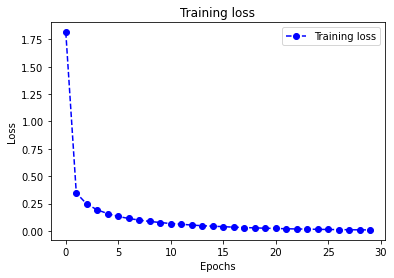

In [71]:
# Plot the training loss for each epoch to see how the model converged.
history_dict = history.history
plt.plot(list(range(0,30)), history_dict['loss'], 'bo--', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model

In [72]:
# Evaluate the model on the test set. 
test_loss, test_acc = model.evaluate(test[data.columns[0:-10]].values, 
          test[data.columns[-10:]].values, 
          verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 0s - loss: 0.2884 - accuracy: 0.9498

Test accuracy: 0.9497619271278381
